In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, recall_score, accuracy_score, f1_score, confusion_matrix, precision_score
from sklearn.svm import SVC

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler, PowerTransformer, PolynomialFeatures, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

from xgboost import XGBClassifier, XGBRegressor

pd.options.display.max_columns = 999
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('survey.csv')

In [3]:
df

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,No,Yes,No,No,No,No,Don't know,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,Yes,Yes,Yes,Yes,No,No,Yes,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,No,Yes,Yes,Yes,No,No,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,Yes,Yes,No,Yes,No,No,Don't know,Don't know,Yes,No,No,No,No,No,No,No,NaN


In [4]:
df.describe()

,Age
count,1.259000e+03
mean,7.942815e+07
std,2.818299e+09
min,-1.726000e+03
25%,2.700000e+01
50%,3.100000e+01
75%,3.600000e+01
max,1.000000e+11


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [6]:
bsDesc = []

for i in df.columns:
    bsDesc.append([
        i,
        df[i].dtypes,
        df[i].isna().sum(),
        round((((df[i].isna().sum() )/ len(df)) * 100),2),
        df[i].nunique(),
        df[i].drop_duplicates().sample(2).values
    ])
pd.DataFrame(data = bsDesc,
            columns = [
                'Features',
                'DataType',
                'Null',
                'NullPercentage',
                'Unique',
                'Unique Sample'
            ])

,Features,DataType,Null,NullPercentage,Unique,Unique Sample
0,Timestamp,object,0,0.00,1246,"[2014-08-27 14:53:11, 2014-08-27 19:13:21]"
1,Age,int64,0,0.00,53,"[39, 329]"
2,Gender,object,0,0.00,49,"[F, Femake]"
3,Country,object,0,0.00,48,"[South Africa, Nigeria]"
4,state,object,515,40.91,45,"[ME, NC]"
5,self_employed,object,18,1.43,2,"[Yes, No]"
6,family_history,object,0,0.00,2,"[Yes, No]"
7,treatment,object,0,0.00,2,"[Yes, No]"
8,work_interfere,object,264,20.97,4,"[nan, Rarely]"
9,no_employees,object,0,0.00,6,"[More than 1000, 26-100]"


In [7]:
# Checking imbalance data
df['treatment'].value_counts(normalize = True)

Yes    0.505957
No     0.494043
Name: treatment, dtype: float64

# Data Cleaning

In [8]:
# Choosing the range of age based on international standard FLSA -> minimum age for employement = 14.  and we set the maximum of 100.
df = df[(df['Age'] >= 14) & (df['Age'] <= 100) ]


In [9]:
df.drop(columns = ['state', 'comments'], inplace = True)
df.drop(columns = ['Timestamp'], inplace = True)


In [10]:
df['Gender'].unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'Enby', 'fluid',
       'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'Malr', 'femail',
       'Cis Man', 'ostensibly male, unsure what that really means'],
      dtype=object)

In [11]:
df['Gender'] = df['Gender'].replace(['Male ', 'male', 'M', 'm', 'Male', 'Cis Male',
                     'Man', 'cis male', 'Mail', 'Male-ish', 'Male (CIS)',
                      'Cis Man', 'msle', 'Malr', 'Mal', 'maile', 'Make',], 'Male')

In [12]:
df['Gender'] = df['Gender'].replace(['Female ', 'female', 'F', 'f', 'Woman', 'Female',
                     'femail', 'Cis Female', 'cis-female/femme', 'Femake', 'Female (cis)',
                     'woman',], 'Female')

In [13]:
df['Gender'].unique()

array(['Female', 'Male', 'Trans-female', 'something kinda male?',
       'queer/she/they', 'non-binary', 'Nah', 'Enby', 'fluid',
       'Genderqueer', 'Androgyne', 'Agender', 'Guy (-ish) ^_^',
       'male leaning androgynous', 'Trans woman', 'Neuter',
       'Female (trans)', 'queer',
       'ostensibly male, unsure what that really means'], dtype=object)

In [14]:
df['Gender'] = df['Gender'].replace(['Trans-female', 'something kinda male?',
       'queer/she/they', 'non-binary', 'Nah', 'Enby', 'fluid',
       'Genderqueer', 'Androgyne', 'Agender', 'Guy (-ish) ^_^',
       'male leaning androgynous', 'Trans woman', 'Neuter',
       'Female (trans)', 'queer',
       'ostensibly male, unsure what that really means'], 'not disclose')

In [15]:
df['Gender'].unique()

array(['Female', 'Male', 'not disclose'], dtype=object)

In [16]:
df['no_employees'].unique()

array(['6-25', 'More than 1000', '26-100', '100-500', '1-5', '500-1000'],
      dtype=object)

In [17]:
# binning

In [18]:
df['no_employees'] = df['no_employees'].map({'1-5' : 1, '6-25' :2, '26-100' :3, '100-500' : 4, '500-1000' : 5, 'More than 1000' : 6})

In [19]:
df.rename({'no_employees': 'company_size'}, inplace = True, axis = 1)

In [20]:
df.isna().sum()

Age                            0
Gender                         0
Country                        0
self_employed                 18
family_history                 0
treatment                      0
work_interfere               262
company_size                   0
remote_work                    0
tech_company                   0
benefits                       0
care_options                   0
wellness_program               0
seek_help                      0
anonymity                      0
leave                          0
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
dtype: int64

In [21]:
df_ml = df.copy()

In [22]:
df['treatment'] = df['treatment'].map({'Yes' : 1, 'No' : 0})

In [23]:
df

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,company_size,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,NaN,No,1,Often,2,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,Male,United States,NaN,No,0,Rarely,6,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,No,0,Rarely,2,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,Yes,1,Often,3,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,NaN,No,0,Never,4,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,26,Male,United Kingdom,No,No,1,NaN,3,No,Yes,No,No,No,No,Don't know,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No
1255,32,Male,United States,No,Yes,1,Often,3,Yes,Yes,Yes,Yes,No,No,Yes,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No
1256,34,Male,United States,No,Yes,1,Sometimes,6,No,Yes,Yes,Yes,No,No,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,No
1257,46,Female,United States,No,No,0,NaN,4,Yes,Yes,No,Yes,No,No,Don't know,Don't know,Yes,No,No,No,No,No,No,No


# Simple EDA

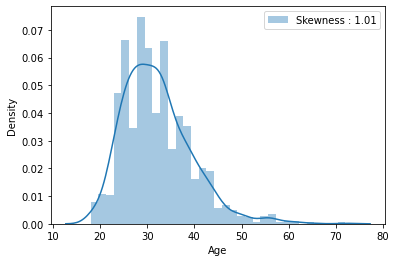

In [24]:
sns.distplot(df['Age'], label = 'Skewness : %.2f'%(df['Age'].skew()))
plt.legend()
plt.show()

- Based on the table above, it shows that the age distribution has a skewness of 1.01 -> positive skew, which means that the mean and median are greater than the mode.
- Employee age range ranges from 20-40 years, which is usually very common in today's tech companies where younger employees dominate.

In [80]:
mean_fam = (df[['treatment', 'family_history']].groupby('family_history').mean()*100).reset_index()
mean_fam

,family_history,treatment
0,No,35.433071
1,Yes,74.028630


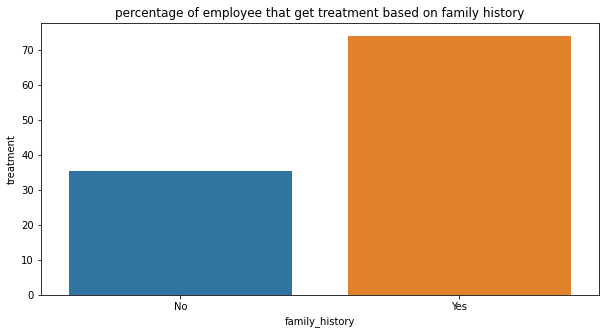

In [85]:
plt.figure(figsize = (10,5))
sns.barplot(mean_fam['family_history'],   mean_fam['treatment'])
plt.title('percentage of employee that get treatment based on family history')
plt.show()

Employees who need treatment have inheritance from the family history. Family history plays an important role in the psychological health of employees because the majority of time spent is with family (from infants to adults) so that the family factor is one of the major factors in the mental health of employees.

In [94]:
df[['Age', 'treatment']].groupby('Age').sum().sort_values('treatment', ascending = False).head()

,treatment
Age,
32,41
33,39
26,37
28,36
29,36


Based on the table above, the ages of 26-29, and 32-33 are the ages where employees need the most treatment. 26-33 can be said to be the age which is included in the middle - senior level based on length of work.

In [27]:
df[['Gender', 'treatment']].groupby('Gender').mean()*100

,treatment
Gender,
Female,68.825911
Male,45.436105
not disclose,77.777778


In [28]:
df[['Gender', 'treatment']].groupby('Gender').count()

,treatment
Gender,
Female,247
Male,986
not disclose,18


Male gender employees make up the majority of the main employees in a tech company, but if seen from the gender percentage that requires treatment, the highest is female with a percentage of 68.8%. It is possible that females are subjected to sexual harassment from males because of their low population in the tech company. From a psychological point of view, women are more sensitive to feelings than men, so that the mental health of women is more volatile than men.

In [29]:
df[['work_interfere', 'treatment']].groupby('work_interfere').mean()*100

,treatment
work_interfere,
Never,14.150943
Often,85.000000
Rarely,70.520231
Sometimes,76.939655


There are more than 70% of respondents who answered that mental illness can affect work by answering and did the treatment. Respondents who did treatment but answered that they did not feel disturbed, there were still those who did treatment with a percentage of 14%

In [30]:
df[['remote_work', 'treatment']].groupby('remote_work').mean()*100

,treatment
remote_work,
No,49.659091
Yes,52.560647


The number of employees who work outside the office is more likely to do health treatment by 52% of the respondents who work outside the office. Meanwhile, the number of employees who work in offices who do health treatment is almost 50 or evenly. Working remotely / outside the office can be a stressful factor for employees because of being away from family.

In [31]:
df[['company_size', 'treatment']].groupby('company_size').mean()*100

,treatment
company_size,
1,55.696203
2,43.944637
3,51.736111
4,54.285714
5,45.000000
6,51.957295


Along with the development of the times, many startups have sprung up, this startup is usually known as a tough working culture because it is pursuing the development of the company. However, based on the table above, where (1 -> small companies, 6-> large companies) the number of health treatment is quite even. The absence of a health treatment program for employees can be a factor in the even distribution of these figures.

In [32]:
df[['wellness_program', 'treatment']].groupby('wellness_program').count()

,treatment
wellness_program,
Don't know,187
No,837
Yes,227


The majority of respondents did not receive a wellness program from the company. The wellness program might be tough for small companies because it collides with the budget, but it should be for a big company wellness program to be one of the drivers for employee productivity.

# Machine learning 

In [34]:
cat_col = []
num_col = []
for i in df_ml.columns:
    if df_ml[i].dtypes == 'O':
        cat_col.append(i)
    else:
        num_col.append(i)

In [35]:
cat_col.remove('treatment')

In [36]:
cat_col.remove('work_interfere')

In [37]:
cat_col.remove('self_employed')

In [38]:
num_col

['Age', 'company_size']

In [39]:
cat_col

['Gender',
 'Country',
 'family_history',
 'remote_work',
 'tech_company',
 'benefits',
 'care_options',
 'wellness_program',
 'seek_help',
 'anonymity',
 'leave',
 'mental_health_consequence',
 'phys_health_consequence',
 'coworkers',
 'supervisor',
 'mental_health_interview',
 'phys_health_interview',
 'mental_vs_physical',
 'obs_consequence']

# Splitting Data

In [40]:
X = df_ml.drop(columns = 'treatment')
y = df_ml['treatment']
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify = y , test_size = 0.2, random_state =42)

# Pipeline

In [41]:
cat_col_input = Pipeline([
    ('imputer', SimpleImputer(strategy= 'most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown= 'ignore'))
     ])

In [42]:
preprocessor = ColumnTransformer([
    ('input', cat_col_input, ['work_interfere', 'self_employed']),
    ('oh', OneHotEncoder(handle_unknown = 'ignore'), cat_col),
  
], remainder = 'passthrough')

In [43]:
pipeline_LR = Pipeline([
    ('prep', preprocessor),
    ('algo', LogisticRegression())
])
pipeline_KNN = Pipeline([
    ('prep', preprocessor),
    ('algo', KNeighborsClassifier())

])
pipeline_SVC = Pipeline([
    ('prep', preprocessor),
    ('algo', SVC())
])
pipeline_DT =  Pipeline([
    ('prep', preprocessor),
    ('algo', DecisionTreeClassifier())
])
pipeline_RF =  Pipeline([
    ('prep', preprocessor),
    ('algo', RandomForestClassifier())
])

In [44]:
def evamatrix(model, X_train, y_train, X_test, y_test):
    model = model.fit(X_train,y_train)
    y_predts = model.predict(X_test)
    akurasits = accuracy_score(y_test, y_predts)
    y_predtr = model.predict(X_train)
    akurasitr= accuracy_score(y_train, y_predtr)
    return akurasitr, akurasits
    

In [45]:
logreg_tr, logreg_ts = evamatrix(pipeline_LR, X_train, y_train, X_test, y_test)
knn_tr, knn_ts = evamatrix(pipeline_KNN, X_train, y_train, X_test, y_test)
svc_tr, svc_ts = evamatrix(pipeline_SVC,X_train, y_train, X_test, y_test)
DT_tr, DT_ts = evamatrix(pipeline_DT, X_train, y_train, X_test, y_test)
RF_tr, RF_ts = evamatrix(pipeline_RF, X_train, y_train, X_test, y_test)

In [46]:
pd.DataFrame(data = [logreg_tr, logreg_ts, knn_tr, knn_ts, svc_tr, svc_ts ,DT_tr, DT_ts, RF_tr, RF_ts], index = ['logreg_train', 'logreg_test', 'knn_train', 'knn_test', 'SVC_train', 'SVC_test' ,'DecisionTree train', 'DecisionTree test', 'RF train', 'RF test'])

,0
logreg_train,0.768000
logreg_test,0.764940
knn_train,0.783000
knn_test,0.633466
SVC_train,0.693000
SVC_test,0.713147
DecisionTree train,1.000000
DecisionTree test,0.689243
RF train,1.000000
RF test,0.780876


# HyperParam

In [47]:
skf = StratifiedKFold(n_splits=3, random_state = 42)

In [48]:
param_LR = {
    'algo__penalty': ['l2', 'l1', 'elasticnet', None],
     'algo__C' : np.logspace(-3, 3, 7),
     'algo__solver': ['lbfgs', 'liblinear', 'sag', 'saga'],
    
}

In [49]:
LR_GS = GridSearchCV(pipeline_LR, param_LR, cv = skf, scoring = 'accuracy', n_jobs= -1, verbose = 1)

In [50]:
LR_GS.fit(X_train,y_train)

Fitting 3 folds for each of 112 candidates, totalling 336 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 336 out of 336 | elapsed:    5.9s finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=False),
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('input',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['work_interfere',
                                                                          'self_employed']),
                                                           

In [51]:
LR_GS.best_params_

{'algo__C': 1000.0, 'algo__penalty': 'l2', 'algo__solver': 'lbfgs'}

In [52]:
LR_tuned = LR_GS.best_estimator_

In [53]:
logregtuned_tr, logregtuned_ts = evamatrix(LR_tuned, X_train, y_train, X_test, y_test)


# KNN Hyperparam

In [54]:
param_KNN = {
    'algo__n_neighbors': np.arange(1,51,2),
    "algo__p" : [1,2],
    'algo__weights' : ['uniform']
}

In [55]:
KNN_GS = GridSearchCV(pipeline_KNN, param_KNN, cv = skf, scoring = 'accuracy', n_jobs= -1, verbose = 1)

In [56]:
KNN_GS.fit(X_train,y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.9s finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=False),
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('input',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['work_interfere',
                                                                          'self_employed']),
                                                           

In [57]:
KNN_Tuned = KNN_GS.best_estimator_
knnTuned_tr, knnTuned_ts = evamatrix(KNN_Tuned, X_train, y_train, X_test, y_test)


# SVC Hyperparam

In [58]:
pipeline_SVC.get_params()

{'memory': None,
 'steps': [('prep', ColumnTransformer(remainder='passthrough',
                     transformers=[('input',
                                    Pipeline(steps=[('imputer',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('onehot',
                                                     OneHotEncoder(handle_unknown='ignore'))]),
                                    ['work_interfere', 'self_employed']),
                                   ('oh', OneHotEncoder(handle_unknown='ignore'),
                                    ['Gender', 'Country', 'family_history',
                                     'remote_work', 'tech_company', 'benefits',
                                     'care_options', 'wellness_program',
                                     'seek_help', 'anonymity', 'leave',
                                     'mental_health_consequence',
                                  

In [59]:
SVC()

SVC()

In [60]:
param_SVM = {
    'algo__C' : np.logspace(-3,3,7),
    'algo__gamma' : np.arange(10, 101, 10)
}

In [61]:
SVM_GS = GridSearchCV(pipeline_SVC, param_SVM, cv = skf, scoring = 'accuracy', n_jobs= -1, verbose = 1)

In [62]:
SVM_GS.fit(X_train,y_train)

Fitting 3 folds for each of 70 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:    5.4s finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=False),
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('input',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['work_interfere',
                                                                          'self_employed']),
                                                           

In [63]:
SVM_Tuned = SVM_GS.best_estimator_
svmTuned_tr, svmTuned_ts = evamatrix(SVM_Tuned, X_train, y_train, X_test, y_test)

# Fine tuning Random Forest 

In [64]:
pipeline_RF_fine =  Pipeline([
    ('prep', preprocessor),
    ('algo', RandomForestClassifier(n_estimators = 500, 
    max_depth = 6, 
    max_features = 0.8))
]) 

In [65]:
pipeline_RF_fine.fit(X_train,y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('input',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['work_interfere',
                                                   'self_employed']),
                                                 ('oh',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gender', 'Country',
                                                   'family_history',
                                                   'remo

In [66]:
rfTuned_tr, rfTuned_ts = evamatrix(pipeline_RF_fine, X_train, y_train, X_test, y_test)

# XG boosting

In [67]:
pipeline_XGboost =  Pipeline([
    ('prep', preprocessor),
    ('algo', XGBClassifier())]) 

In [68]:
XG_tr, XG_ts = evamatrix(pipeline_XGboost, X_train, y_train, X_test, y_test)

[12:53:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [69]:
pipeline_XGboostfine =  Pipeline([
    ('prep', preprocessor),
    ('algo', XGBClassifier(
    n_estimators = 95, reg_lambda = 2, gamma = 0, reg_alpha = 1,
    eta = 0.01, min_child_weight = 2, max_depth = 7 )
                          )]) 

In [70]:
XGfine_tr, XGfine_ts = evamatrix(pipeline_XGboostfine, X_train, y_train, X_test, y_test)


[12:53:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [71]:
tuned = pd.DataFrame(data = [logregtuned_tr, logregtuned_ts, knnTuned_tr, knnTuned_ts, svmTuned_tr, svmTuned_ts, rfTuned_tr, rfTuned_ts, XGfine_tr, XGfine_ts], index = ['logreg train', 'logreg test', 'knn train', 'knn test', 'svc train', 'svc test', 'random forest train', 'random forest test', 'xg train', 'xg test'])
tuned['Accuracy_score base'] = [logreg_tr, logreg_ts, knn_tr, knn_ts, svc_tr, svc_tr, RF_tr, RF_ts, XG_tr, XG_ts]
tuned.columns = ['Accuracy_score Tuned', 'Accuracy_score base']
tuned

,Accuracy_score Tuned,Accuracy_score base
logreg train,0.779000,0.768000
logreg test,0.764940,0.764940
knn train,0.720000,0.783000
knn test,0.713147,0.633466
svc train,1.000000,0.693000
svc test,0.509960,0.693000
random forest train,0.809000,1.000000
random forest test,0.780876,0.780876
xg train,0.820000,1.000000
xg test,0.780876,0.745020


# Conclusion

- Gender, family history, and age can be one of the biggest factors affecting mental health. Based on the data, mental health has an effect on work (work_interfere) and companies that provide wellness programs are not much because the majority of respondents do not get a wellness program from the company.

- Data preprocessing is not done with scaling and power transform because the data form is categorical and numeric discrete.
- The best algorithm for predicting whether a respondent needs treatment or not is XGBoost fine tuning with an accuracy value of 78% for the test data and 82% for the train data